# Multi-variate linear regression

## 1. Definition and parameter estimation

As we remember linear model between single real-value regressor $x$ and output variable $y$ is expressed by 
$$
y=w_1 x + w_0 +\varepsilon.
$$
$w_1$-slope coefficient, $w_0$ - intercept, $\varepsilon$ - random noise. In a more general case when $x$ is a real-valued $n \times 1$-vector $x=(x_1,x_2,...,x_n)^T$, the model could be easily generalized as
$$
y=\sum\limits_j w_j x_j +\varepsilon
$$
or in a vector form
$$
y=w^T x+\varepsilon, \hspace{5ex} (1)
$$
where $w=(w_1,w_2,...,w_n)$ is also a $n x 1$-vector. 
Notice that intercept is not specifically separated as it could be always introduced by adding a dummy variable $x^m\equiv 1$.

The probabilistic view on the model in the assumption that $\varepsilon\sim {\cal N}(0,\sigma^2)$ is
$$
p(y|x,w,\sigma)={\cal N}(y|w^T x,\sigma^2).
$$

Given a training set $X=\{(x_j^i), j=1..n, i=1..N\}$, $Y=\{(y^i), i=1..N\}$ (further also denote columns of $X$ as $X_j=\{(x_j^i), i=1..N\}$), the least square optimization criteria for inferring a vector of coefficients $w$ can be written as
$$
RSS(w)=\sum\limits_i \varepsilon_i^2=\sum\limits_i (y^i-w^T x^i)^2. \hspace{5ex} (2)
$$
or in a matrix form:
$$
RSS(w)=(Y-X w)^T(Y-X w).
$$
Then finding an estimate
$$
\hat{w}=argmin_w RSS(w)
$$
can be done by solving the system (in a matrix form)
$$
0=\frac{\partial RSS(\hat{w})}{\partial w}=2X^T (Y-X \hat{w}).
$$
Using matrix formalism the solution could be expressed as
$$
\hat{w}=\left(X^T X\right )^{-1}X^T Y. \hspace{5ex} (3)
$$
This assumes that $X^T X$ is non-singular. Otherwise we have a case of multicollinearity which will be considered during the second session.

## 2. Geometry of Least Squares

According to (3), model estimates $\hat{Y}$ corresponding to the given points in $X$ are
$$
\hat{Y}=X \hat{w}=X(X^T X)^{-1}X^T Y.
$$
This way matrix $H=X(X^T X)^{-1}X^T$ performs an ortogonal projection $HY$ of a given vector of observations $Y$ onto the linear space of all possible linear combinations of columns of $X$.

## 3. Explanations of R-squared

In the same way as for the bi-variate regression:
$$
R^2=1-\frac{RSS}{\sum\limits_i (y_i-\overline{y})^2}=\frac{\sum\limits_i (\hat{y}_i-\overline{y})^2}{\sum\limits_i (y_i-\overline{y})^2},
$$
where $\overline{y}=\sum\limits_i y_i$ is the sample mean of observed values of responce variable. This way $R^2$ is often interpreted as a fraction of responce variable's variance explained by linear model. $R^2=1$ is equivalent to $RSS=0$, i.e. the model fits the observations exactly, i.e. responce variable depends linearly on the explaining variables. On the other hand, $R^2=0$ means that the model always predicts the sample mean $\overline{y}$, i.e. explaining variables $x$ have no effect on responce variable $y$. 

Least-square criteria is equivalent to maximizing $R^2$.

## 4. Feature scaling

Often in order to get some sense out of the values of $w_j$ one might want to normalize the features first, brinding them on the same scale. For example one can standardszation, transforming independent variables into their standard scores (also called z-scores, normal scores):
$$
x_j^*=\frac{x_j-\overline{x}_j}{\sigma_j}
$$
where $\overline{x}_j=E[X_j]$ and $\sigma_j=std[X_j]$ are the corresponding sample mean and standard deviation. This however does not apply to a constant dummy variable corresponding to the intercept term if present. One might omit this dummy variable in case if responce variable is also standardized (then it's mean is also zero and there is no need for an intercept). 

Then, the resulting coefficients $\hat{w}_j$ could be interpreted as a relative (or absolute if the output variable is also standardized) strength of each regressor's impact on the responce variable $x_j$.

## 5. Case of orthogonal regressors

Consider a particular case of orthogonal regressors. I.e. suppose that for each pair of $j\neq k$ the inner product equals to zero: $<X_j,X_k>=X_j^T X_k=\sum\limits_i x_j^i x_k^i=0$. For the standardized regressors orthogonality is equivalent to being uncorrelated; more generally if at least one of the regressors $x_j$ is standardized (consequently $E[X_j]=0$) then:
$$
0=corr[X_j,X_k]=\frac{Cov[X_j,X_k]}{std[X_j]std[X_k]}=\frac{<X_j,X_k>/N-E[X_j]E[X_k]}{std[X_j]std[X_k]}=\frac{<X_j,X_k>}{N std[X_j]std[X_k]}.
$$
In that case it is possible to show that least square estimate for the multiple regression could be built from a set of univariate regressions of $y$ vs each of the regressors $x_j$ taken separately. Then
$$
\hat{w_j}=\frac{X_j^T Y}{X_j^T X_j}.
$$
If $X_j$ is also standardized, so that $E[X_j]=0$ and $Var[X_j]=1$, the above could be re-written as
$$
\hat{w_j}=Cov[X_j,Y].
$$
Also this way 
$$
Var[Y]=Var[\varepsilon]+\sum_j Var[w_j X_j]=\sigma^2+\sum_j w_j^2.
$$
This gives a very intuitive interpretation of the regression coefficients (or actually their squares) as a decomposition of the explained part of responce variable's variation $Var[Y]-\sigma^2$. 

However this works only for the basic least-square estimates $w=\hat{w}$, $\sigma=\hat{\sigma}$. While depending on the estimation technique used for $\hat{w}$ and $\hat{\sigma}$ (like using unbiased estimates for example), this equation might only hold approximately.

If $Y$ is also standardized then $\hat{w_j}=corr[X_j,Y]$, i.e. coefficients of such a regression are simply the correlation coefficients of observed sample of responce variable vs each of the regressors. So basically the multivariate regression with ortognal standardized regressors and standardized responce variable could be expressed as
$$
y=\sum\limits_j corr[X_j,Y] x_j+\varepsilon.
$$
This way the regression coefficients are simply the correlations between corresponding regressors and the responce variable's observations.

Although the case of ortogonal (uncorrelated) regressors seems to be quite a special one, during the next session, we'll see that actually every regression could be transformed to such a case through a principle component decomposition.


## 6. Non-linear polynimial regression 

Multi-variate linear regression could be also used in order to fit non-linear models, such as polynomial one for example. If one needs to fit a dependence of 
$$
y=w_mx^m + w_{m-1} x^{m-1} + \ldots + w_1 x + w_0+\epsilon,
$$
one way of doing that it thourgh a multi-variate regression, selecting 
$$
y\sim 1,x,x^2,\ldots,x^{m}
$$ 
as $m+1$ features. Similarly a polinomial form of several variables could be fit, like 
$$
y\sim w_{2,0}x_1^2+w_{1,1}x_1 x_2+w_{2,0}x_2^2+w_{1,0}x_1+w_{0,1}x_2+w_{0,0}
$$
could be handled over a feature space including
$$
y\sim 1,x_1,x_2,x_1^2,x_2^2.
$$

In [1]:
%pwd

u'/Users/CQ/ADS_2016/Lab'

## Shortcuts:
* Ctrl + Enter, Shift + Enter
* "a, b, dd, [x, c & v]"
* Tab-completion
* Question mark (?)

In [4]:
import numpy as np   # basic numeric module in python, for array and matrix computation
import pandas as pd  # advanced numeric module, excels in data frame analysis
import matplotlib.pyplot as plt  # for data visualization
%pylab inline
# so the plots are embedded in notebook rather than a stand alone window

from mpl_toolkits.mplot3d import Axes3D  # for 3D plot
import statsmodels.formula.api as smf    # for OLS regression



Populating the interactive namespace from numpy and matplotlib


In [6]:
path = 'https://serv.cusp.nyu.edu/cq299/ADS_2016/Data/Car.csv'
pd.read_csv(path).head()

HTTPError: HTTP Error 404: Not Found

# Example 1, basics

In [9]:
data1 = pd.read_csv(path + '\\Example1.csv')
data1.head()

,x1,x2,y
0,1.964692,-2.138607,-5.605927
1,-2.731485,0.513148,-18.856722
2,2.194690,-0.768935,-6.063095
3,4.807642,1.848297,-3.608380
4,-0.190681,-1.078825,-11.665918


### (A) Matrix computation
### $$\hat{w}=\left(X^T X\right )^{-1}X^T Y. \hspace{5ex} $$

In [10]:
#Q1. Create a new column x0 for intercept, set the values to 1
data1['x0'] = 1
#Q2. Create X and Y in matrix form then use matrix computation formula to calculate the coefficients
X = np.matrix(data1.loc[:,['x0','x1','x2']])
Y = np.mat(data1.y).T
w = (X.T * X).I * X.T * Y
print(w)

[[-10.10498527]
 [  2.67679769]
 [ -0.70613511]]


### (B) *statsmodels* module

In [11]:
#Q3. Use statsmodels to regress y over x1 and x2, provide the r-squared and coefficients

lm1 = smf.ols(formula = 'y ~ x1 + x2', data = data1).fit()
print('R2 = %f'%lm1.rsquared)
print(lm1.params)

R2 = 0.776112
Intercept   -10.104985
x1            2.676798
x2           -0.706135
dtype: float64


In [12]:
#Q4. Compare the coefficients obtained through different methods
pd.DataFrame({'Matrix_Computation':w.tolist(), 'Regression':lm1.params})
# First create a dict object, claiming the labels and respective data, then convert it to a data frame

,Matrix_Computation,Regression
Intercept,[-10.1049852733],-10.104985
x1,[2.67679768576],2.676798
x2,[-0.706135109154],-0.706135


In [15]:
#Q5. Extra credit: Find the max/min of each variable and then plot the observation and prediction in 3D plot
data1.describe()

,x1,x2,y,x0
count,20.000000,20.000000,20.000000,20.0
mean,0.027218,-0.075481,-9.978829,1.0
std,2.397628,2.247203,7.251472,0.0
min,-4.078951,-4.403221,-24.968052,1.0
25%,-1.428640,-1.797155,-14.739759,1.0
50%,-0.652825,-0.022391,-9.617834,1.0
75%,2.022191,1.444395,-6.344681,1.0
max,4.807642,3.933892,7.571092,1.0


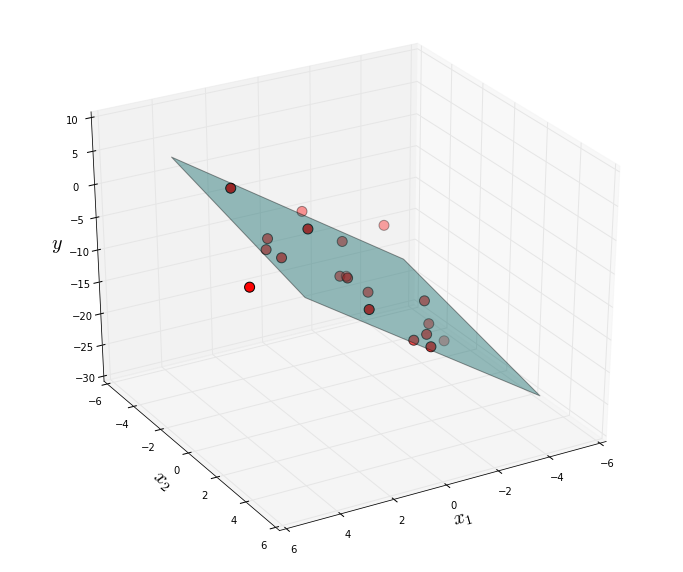

In [14]:
radius = 5

fig = plt.figure(figsize = (12,10))  # Create a plot with customized figure size (width, height)
ax = fig.gca(projection='3d')  # Extract the axis for further operations
ax.scatter(data1.x1, data1.x2, data1.y, s = 100,  c = 'r')
# Scatter plot, "c" stands for color, and "s" determines the marker size

# Generate coordinates for hyperplane
xx, yy = np.meshgrid(range(-radius,radius), range(-radius,radius))
zz = lm1.params[0] + lm1.params[1] * xx + lm1.params[2] * yy

# alpha (between 0 and 1) controls the transparency with 0 being totally transparent
ax.plot_surface(xx, yy, zz, color='c', alpha = 0.4)
# Set labels and fontsize
ax.set_xlabel('$x_1$', fontsize = 20)
ax.set_ylabel('$x_2$', fontsize = 20)
ax.set_zlabel('$y$', fontsize = 20)

ax.view_init(azim = 60)   # Controls the viewing angle

Starting from now we denote Income per capita by IPC:
$$IPC = \frac{Total \: Income}{Total \: Population}$$
But Total Income can be calculated as
$$ \sum_{category} (Average \: Income \: within \: each\: Category  \times Population \: within\: each\: Category)$$
Then, IPC can be rewritten as
$$ \sum_{category} (Average \: Income \: within \: each\: Category  \times \frac{Population \: within\: each\: Category}{Total \: Population}) = \sum_{k} (I_k \times p_k)$$
where k is the category index, $I_k$ is the average income within category k, and $p_k$ is the population percentage of category k.  
Our goal is to fit these $I_k$ as regression coefficients, note that since all these percentages sum up to 100%, we can omit one $p_k$ and rewrite this term as 1 minus the rest. For example, if there are 3 categories in total, we have:
$$p_1 + p_2 + p_3 = 1$$which means$$p_3 = 1 - p_1 - p_2$$
Hence  $$IPC = I_1p_1 + I_2p_2 + I_3p_3$$ $$= I_1p_1 + I_2p_2 + I_3(1 - p_1 -p_2)$$ $$= I_3 + (I_1 - I_3)p_1 + (I_2 - I_3)p_2$$
which means we are equivalently fitting $I_3, (I_1 - I_3), (I_2 - I_3)$ rather than $I_1, I_3, I_3$, this is also where the intercept ($I_3$) comes from.

## Example 2, Income vs Education
### Memo:
* **IncomePerCapita**----measured in USD
* **PopOver25** et al----population number under each category
    * total population over 25 years old
    * holds a Bachelor's degree
    * graduate from professional school, etc.

(1). Load data, verify that the number of category **PopOver25** is indeed the sum of all other population categories

In [22]:
data2 = pd.read_csv(path + '\\data\\IncomeEduReg.csv', index_col = 0)

# If two things are equal, then Boolean operation (a == b) would return True
# which can be intepreted as integer 1 in Python, thus if the product is 1
# then all entries must be 1 (one False would cause the multiplication to yield 0)
prod(data2.iloc[:,2:].sum(1) == data2.PopOver25)

1

(2). Make sure there is no NaN or 0 in the denominator before converting population number(integer) into percentage(float)

(3). Change the unit of **IncomePerCapita** from 1 USD to 1,000 USD for scaling purpose (so the fitted coefficients won't be huge)
   * Note: simply divide each column by the total population **PopOver25** and leave the result in form of 58(%) rather than 0.58

In [23]:
# Take a quick look at the correlation coefficients with respect to Income
data2.corr().IncomePerCapita

IncomePerCapita    1.000000
PopOver25         -0.286507
LessThanHS        -0.530034
HighSchool        -0.559255
SomeCollege       -0.500068
Bachelor           0.262061
Master             0.385013
Doctorate          0.447516
ProfSchool         0.571962
Name: IncomePerCapita, dtype: float64

**LessThanHighSchool**, **HighSchool**, **SomeCollege** have negative coefficients, while other degrees are all positively correlated and the coefficients increase with the degree. **ProfessionalSchool** outweighs the rest.

In [24]:
data2 = data2.dropna()  #drop NAN to avoid invalid computation
data2 = pd.concat([data2.IncomePerCapita,      # Convert unit to 1k USD, only for scaling purpose
        100*data2.iloc[:,2:].div(data2.PopOver25, axis = 0)],  # Compute the percentage, column-wise
        axis = 1)  # Concatenate the Income column with percentages, row-wise

In [25]:
# Let's group a few categories together for model simplification and better demonstration.
data2['Undergrad'] = data2.Bachelor + data2.SomeCollege
data2['Graduate'] = data2.Master + data2.Doctorate
data2['UpToHS'] = data2.LessThanHS + data2.HighSchool
# "Professional School category remains unchanged
data2.head()

,IncomePerCapita,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool,Undergrad,Graduate,UpToHS
Zipcode,,,,,,,,,,,
10001,77512.0,8.506859,10.197207,12.708231,37.120284,20.896619,3.178589,7.392210,49.828515,24.075208,18.704067
10002,26905.0,34.743649,20.872448,14.002495,20.877371,6.566336,1.051992,1.885709,34.879866,7.618329,55.616097
10003,79088.0,3.639940,6.823369,10.965956,43.606430,22.082463,3.948327,8.933515,54.572386,26.030790,10.463309
10004,98020.0,1.272488,3.817464,13.383063,43.176832,24.133392,3.773585,10.443177,56.559895,27.906977,5.089952
10005,99633.0,2.233792,1.729929,7.625126,46.103460,27.494122,3.678200,11.135371,53.728586,31.172321,3.963722


### (c) Run regression with *statsmodels* and provide this linear model's summary information
Note: Leave out **LessThanHighSchool** column and regress over the others since they sum up to 100(%)

In [26]:
lm2 = smf.ols(formula = 'IncomePerCapita ~ Undergrad + Graduate + ProfSchool',
              data = data2).fit()  # formula controls the model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:        IncomePerCapita   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     424.2
Date:                Wed, 14 Sep 2016   Prob (F-statistic):           1.51e-80
Time:                        20:01:07   Log-Likelihood:                -1931.0
No. Observations:                 181   AIC:                             3870.
Df Residuals:                     177   BIC:                             3883.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2966.8469   5213.705     -0.569      0.5

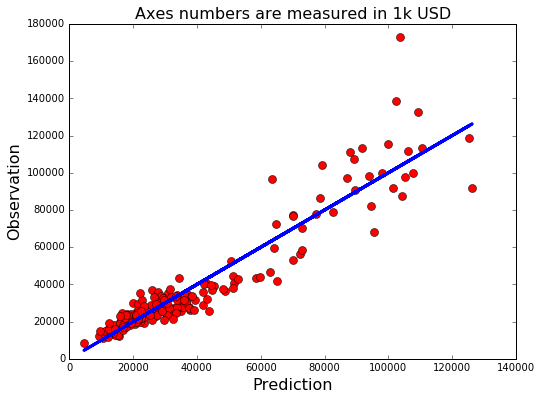

In [27]:
lmy = lm2.predict(data2)   # Calculate the predicted value
plt.figure(figsize = (8,6))
plt.plot(lmy,data2.IncomePerCapita,'or', markersize = 8) # Plot the observed value
plt.plot(lmy,lmy,'-b', lw = 3)                           # Plot the predicted value

# Plot setting
plt.xlabel('Prediction', fontsize = 16)
plt.ylabel('Observation', fontsize = 16)
plt.title('Axes numbers are measured in 1k USD', fontsize = 16)

## Example 3, Polynomial fit

### Given two columns of data, $y$ and $x$, we want to fit it with a polynomial and find the coefficients $w$ $$\hat y(x,w) = \sum\limits_{i=1}^M w_i\cdot x^i$$

In [39]:
# #How the data was generated (reveal in next session)
# np.random.seed(123)
# x = np.linspace(-2,4,10)
# eps = np.random.normal(0,3,10)
# f = lambda x: x**3 - 2*x**2 - 5*x + 1
# y = f(x) + eps

# data3 = pd.DataFrame([y]+[x**i for i in range(10)]).T
# data3.columns = ['y']+['x%d'%i for i in range(10)]
# data3.loc[:,['y','x1']].rename(columns = {'x1':'x'}).to_csv(path + '\\Example3.csv', index = False)

In [28]:
data3 = pd.read_csv(path + '\\Example3.csv')
data3.head()

,y,x
0,-8.256892,-2.000000
1,4.732777,-1.333333
2,3.997084,-0.666667
3,-3.518884,0.000000
4,-4.661727,0.666667


### First we create a new data frame, containing all $x^j$ from $x^0$ (=1, intercept) up to $x^9$

In [29]:
data3 = pd.DataFrame([data3.y]  # Use the list property that they can be concatenated by "+"
            + [np.array(data3.x**i) for i in range(10)]).T # Generate all x^j, then stack them
data3.columns = ['y']+['x%d'%i for i in range(10)]   # Rename the columns for better understanding
data3.head()

,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,-8.256892,1.0,-2.000000,4.000000,-8.000000,16.000000,-32.000000,64.000000,-128.000000,256.000000,-512.000000
1,4.732777,1.0,-1.333333,1.777778,-2.370370,3.160494,-4.213992,5.618656,-7.491541,9.988721,-13.318295
2,3.997084,1.0,-0.666667,0.444444,-0.296296,0.197531,-0.131687,0.087791,-0.058528,0.039018,-0.026012
3,-3.518884,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-4.661727,1.0,0.666667,0.444444,0.296296,0.197531,0.131687,0.087791,0.058528,0.039018,0.026012


In [30]:
# For comparison purpose, we design a small function to perform OLS for each given degree of polynomial
# and return both the r-squared and fitted parameters
def MultiReg(data, degree):
    # First create a string for controlling the number of x_i
    string = ''
    for i in range(degree):
        string += str(i+1)  # For example, if degree == 3, then this string would be '123' at the end
        
    # Next convert this string into our formula
    formula = 'y ~ x' + ' + x'.join(string) # join function will convert '123' to '1 + x2 + x3'

    # Perform regression and return the results
    lm = smf.ols(formula = formula, data = data).fit()
    return lm.rsquared, lm.params


# Run the function and store the results separately
R2 = []; Params = []
for M in range(1,10):
    a,b = MultiReg(data3,M)  # For each M, run the function
    R2.append(a)
    Params.append(b)

R2

[0.016695221729687515,
 0.20770639221492693,
 0.75592879017667169,
 0.78753924885767013,
 0.78753944371387796,
 0.88867000196622559,
 0.90246297972879819,
 0.96384252460820874,
 1.0]

## See how $R^2$ increases as the degree of polynomial increases 

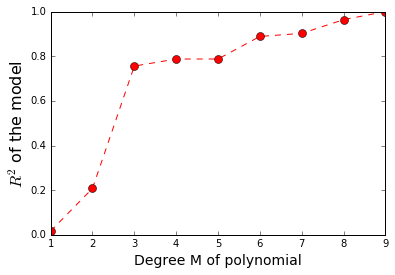

In [31]:
plt.plot(range(1,10),R2,'ro--', markersize = 8)
plt.xlabel('Degree M of polynomial', fontsize = 14)
plt.ylabel('$R^2$ of the model', fontsize = 16)
plt.show()

Finally we plot everything together:
* Red dots are our observations
* Green curve is the actual function
* Blue dashed line is our fitted curve

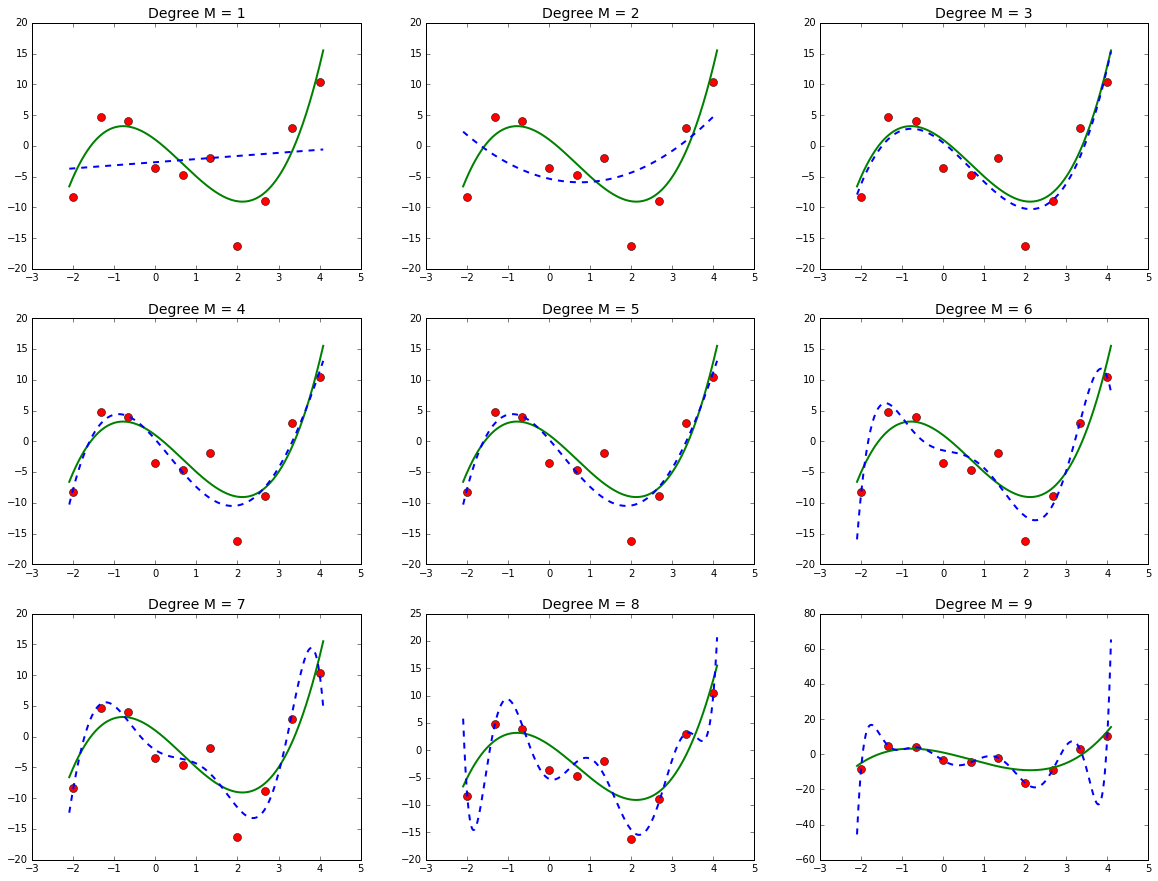

In [32]:
plt.figure(figsize = (20,15))
f = lambda x: x**3 - 2*x**2 - 5*x + 1
for i in range(1,10):
    plt.subplot(330+i)
    x_fit = np.arange(-2.1,4.1,0.01)
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(i+1)]).T, 
                         columns = Params[i-1].index).mul(Params[i-1], 1).sum(1)
    plt.plot(data3.x1,data3.y, 'ro', markersize = 8)
    plt.plot(x_fit,f(x_fit),'g-', lw = 2)
    plt.plot(x_fit,y_fit,'b--', lw =2)
    plt.title('Degree M = %d'%(i), fontsize = 14)

# Homework

## EX 1 Artificial data (25pt -- 5+5+5+10)
### Tasks:
Consider a multivariate regression of the output variable $y$ over the 3 regressors $x_1$, $x_2$, $x_3$ as follows.
* (a) Which one of the regressors serves as dummy variable corresponding to an intercept term?
* (b) Calculate the coefficients $\hat w$ manually or with python *numpy* module.
* (c) Verify your answer by implement the OLS regression function with python *statsmodels* module.
* (d) Visualize the data points and your fitted model in a 3D plot.

In [45]:
ex1 = pd.read_csv(path + '\\homeworks\\HWdata\\H31.csv', index_col=0)
ex1

,y,x1,x2,x3
1,0,1,-2,1
2,2,1,-1,-1
3,2,1,0,0
4,3,1,1,-1
5,3,1,2,1


## EX 2, Income vs Insurance coverage (40pt--10+10+5+10+5)

You are given the demographic data of insurance coverage in NYC, with the details:
* Total population
* Population with No Insurance coverage
* Population with Insurance coverage
    * Population with Public Insurance coverage
    * Population with Private Insurance coverage

### Tasks:
* (a) Verify that there are some people with BOTH public insurance and private insurance according to this data set, then create a new column containing such information
* (b) Modify the old data frame, or simply create a new one, such that this data frame contains (including but not limited to):
    * IncomePerCapita
    * Total Population
    * Population with No Insurance coverage
    * Population with Public Insurance coverage ONLY
    * Population with Private Insurance coverage ONLY
    * Population with BOTH types of Insurance coverage
* (c) Similar to the lab example, drop the parts with NaN(if any), convert all population number into proportion (percentage, with the form 58 instead of 0.58), re-scale the Income unit to 1,000 USD
* (d) Regress over these proportions (the ones mentioned in part b, leave out "No Insurance Coverage") -- What interesting results do we have here?
* (e) Visualize the observed income versus the predicted income, like what we did in the lab session

In [42]:
ex2 = pd.read_csv(path + '\\data\\IncomeInsReg.csv')
ex2.head()

,Zipcode,IncomePerCapita,TotalPop,NoCoverage,WithCoverage,Public,Private
0,10001,77512.0,22767,1958,20809,5800,16795
1,10002,26905.0,79490,9129,70361,40139,35167
2,10003,79088.0,56909,3774,53135,8593,48522
3,10004,98020.0,3024,244,2780,180,2705
4,10005,99633.0,7566,570,6996,122,6944


## EX 3, Polynomial fit (30pt -- 5+5+10+5+5+5)

### Try to fit $y = log(x)$ with a polynomial $$\hat y(x,w) = \sum\limits_{i=1}^M w_i\cdot x^i$$ within the interval (0,1)

### Tasks:
* (a) Generate your ${\bf x}$ as follows: **x = np.arange(0.05,1,0.1)**, then generate error term $\epsilon \sim \mathscr{N}(0, 0.3^2)$ with the same length as ${\bf x}$. (Use random seed **2016**.) Next calculate ${\bf y}$ values with formula ${\bf y} = log({\bf x}) + {\bf \epsilon}$  in vector form
* (b) Create a scatter plot of ${\bf x}$ and ${\bf y}$, add the curve of function $y = log(x)$ on it
* (c) Try to fit the function with polynomial of order 1, 2, 3, 4, respectively
* (d) Report the $R^2$ for each fitted polynomial and observe how it increases
* (e) Plot the curve of fitted polynomial in four subplots
* (f) Based on the plot, which model fits the curve best? Provide the best coefficients $\hat w$

## Solutions:

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### EX 1

[[ 2. ]
 [ 0.7]
 [-0.5]]
Intercept    2.0
x2           0.7
x3          -0.5
dtype: float64


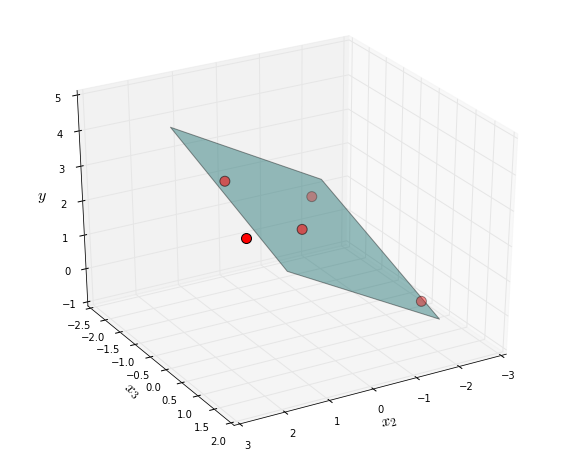

In [48]:
# (a) x1 since they are all 1

# (b)
X = np.matrix(ex1.iloc[:,1:])
Y = np.matrix(ex1.y).T
w = (X.T * X).I * X.T * Y
print(w)

# (c)
coef = smf.ols(formula = 'y ~ x2 + x3', data = ex1).fit().params
print(coef)

# (d)
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')   # Extract the axis for further operations
ax.scatter(ex1.x2, ex1.x3, ex1.y, c = 'r', s = 100)
# Scatter plot, "c" stands for color, and "s" determines the marker size
steps = np.arange(-2,2,0.5)
# Generate coordinates for hyperplane:
xx, yy = np.meshgrid(steps, steps)
zz = coef[0] + coef[1] * xx + coef[2] * yy

ax.plot_surface(xx,yy,zz, color='c', alpha = 0.4)  # alpha controls the transparency
ax.set_xlabel('$x_2$', fontsize = 16)
ax.set_ylabel('$x_3$', fontsize = 16)
ax.set_zlabel('$y$', fontsize = 16)
ax.view_init(azim=60)
plt.show()

## EX 2

In [47]:
ex2.IncomePerCapita.describe()

count       181.000000
mean      38940.607735
std       29842.785729
min        8278.000000
25%       21905.000000
50%       27811.000000
75%       39540.000000
max      173257.000000
Name: IncomePerCapita, dtype: float64

                            OLS Regression Results                            
Dep. Variable:        IncomePerCapita   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     97.17
Date:                Wed, 14 Sep 2016   Prob (F-statistic):           3.25e-37
Time:                        20:14:28   Log-Likelihood:                -2033.2
No. Observations:                 181   AIC:                             4074.
Df Residuals:                     177   BIC:                             4087.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -6.303e+04   2.76e+04     -2.280      0.0

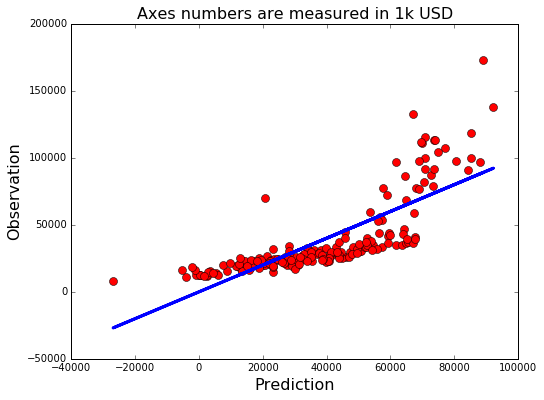

In [44]:
#(a)
ex2 = pd.read_csv(path + '\\data\\IncomeInsReg.csv', index_col = 0)
ex2['Both'] = (ex2.iloc[:,-2:].sum(1) - ex2.WithCoverage)

#(b)
ex2.Public -= ex2.Both
ex2.Private -= ex2.Both

#(c)
ex2 = ex2.dropna()  #drop NAN to avoid invalid computation
ex2 = pd.concat([ex2.IncomePerCapita,      # Convert unit to 1k USD, only for scaling purpose
        100*ex2.iloc[:,2:].div(ex2.TotalPop, axis = 0)],  # Compute the percentage, column-wise
        axis = 1)  # Concatenate the Income column with percentages, row-wise

#(d)
lm = smf.ols(formula = 'IncomePerCapita ~ Public + Private + Both', data = ex2).fit()
print(lm.summary())

#(e)
lmy = lm.predict(ex2)   # Calculate the predicted value
plt.figure(figsize = (8,6))
plt.plot(lmy,ex2.IncomePerCapita,'or', markersize = 8) # Plot the observed value
plt.plot(lmy,lmy,'-b', lw = 3)                         # Plot the predicted value
# Students are not required to have such visualization settings as long as they got the correct answer
plt.xlabel('Prediction', fontsize = 16)
plt.ylabel('Observation', fontsize = 16)
plt.title('Axes numbers are measured in 1k USD', fontsize = 16)

#### Students are expected to answer something like "The coefficient of 'Private Insurance Coverage' is the highest, which can be associated with a reasonable guess that, the people who are willing to pay for private insurance are generally richer than others."
#### If they didn't say such things but present the coefficients at least, then partial credits should be granted.

## Ex 3

### Tasks:
* (a) Given your x points as follows: **x = np.arange(0.05,1,0.1)**, then generate error term $\epsilon \sim \mathscr{N}(0, 0.3^2)$ with random seed **2016**. Next calculate all y values with $y = log(x) + \epsilon$
* (b) Create a scatter plot of x and y, add the curve of function $y = log(x)$ on it
* (c) Try to fit the function with polynomial of order 1, 2, 3, 4, respectively
* (d) Report the $R^2$ for each fitted polynomial and observe how it increases
* (e) Plot the curve of fitted polynomial in four subplots
* (f) Based on the plot, which model fits the curve best? Provide the best coefficients $\hat w$

[0.77128342252639914, 0.86548917937805436, 0.95549681467909287, 0.95560851481699316]


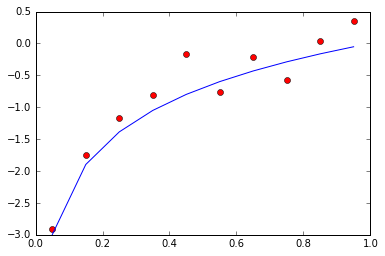

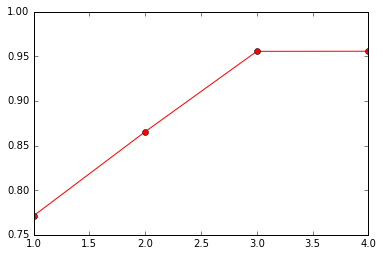

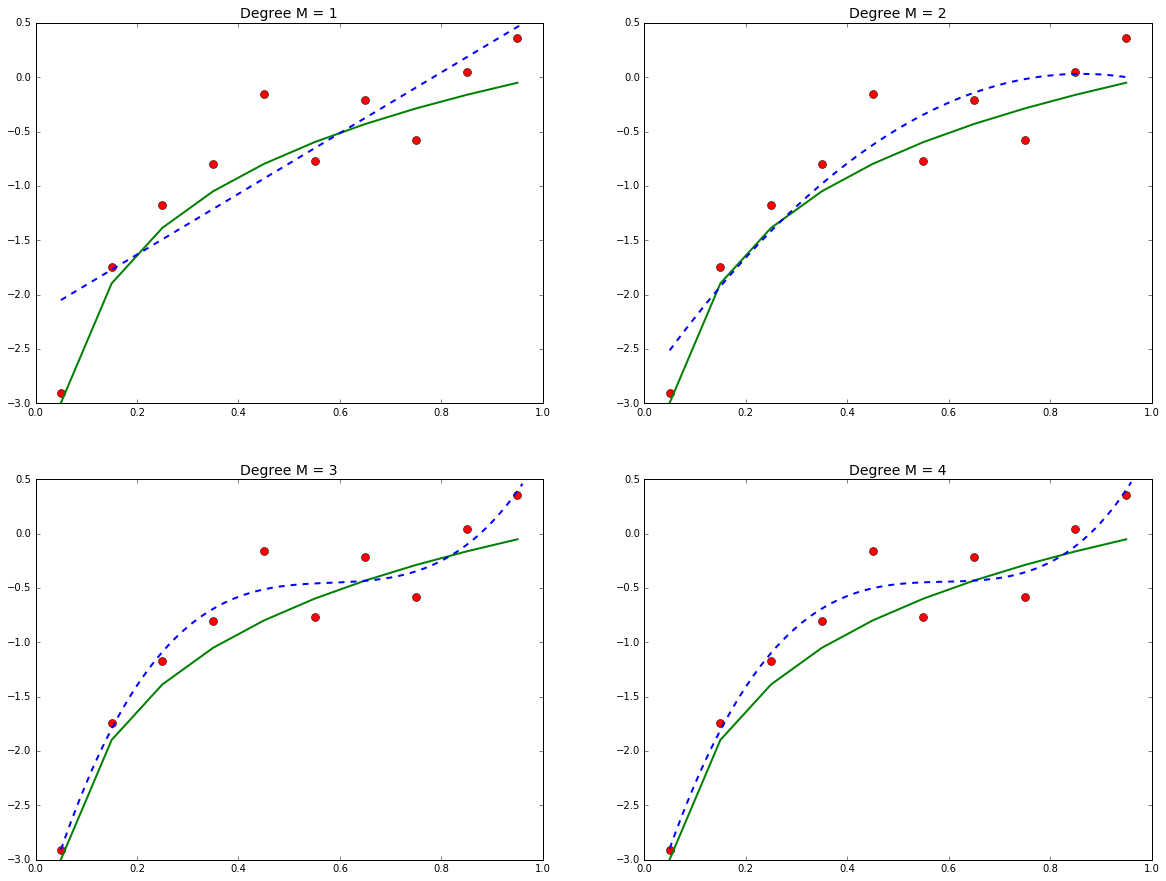

In [50]:
#(a)
np.random.seed(2016)
x = np.arange(0.05,1,0.1)
eps = np.random.normal(0,0.3,10)
y = log(x) + eps


#(b)
plt.plot(x,y,'ro')
plt.plot(x,log(x))

#(c)
ex3 = pd.DataFrame([y]+[x**i for i in range(5)]).T
ex3.columns = ['y']+['x%d'%i for i in range(5)]

#(d)
R2 = []; Params = []
for i in range(1,5):
    a,b = MultiReg(ex3,i)
    R2.append(a)
    Params.append(b)

plt.figure()
plt.plot(range(1,5),R2,'ro-')  # Or, students can simply provide the information by showing:
print(R2)
    
#(e)   Pick M = 2
plt.figure(figsize = (20,15))
for i in range(1,5):
    plt.subplot(220+i)
    x_fit = np.arange(0.05,0.97,0.01)
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(i+1)]).T, 
                         columns = Params[i-1].index).mul(Params[i-1], axis =1).sum(1)
    plt.plot(x,y, 'ro', markersize = 8)
    plt.plot(x, log(x),'g-', lw = 2)
    plt.plot(x_fit,y_fit,'b--', lw =2)
    plt.title('Degree M = %d'%(i), fontsize = 14)